# Assignment 3: Linear regression {-}
## Overview

This assignment aims at familiarizing you with the use of Linear Regression model supported by scikit-learn. You will have to:

- Analyze the data.
- Pre-process the data.
- Split train/test sets.
- Train a Linear Regression model using the training set, then make prediction on the test set.
- Evaluate the model performance on the test set.

The dataset you will be working on is 'house-loan.csv'. It is composed of attributes such as gender, age, income, etc. This dataset is to predict the loan amount for which a customer can request a bank with his/her collateral house.

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment3-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named DataViz-Summer22-\<StudentID>-Assignment3 (e.g., DataViz- Summer22-2012345-Assigment3) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how properly you analyze, pre-process, split the data for training/testing purpose, then build a regression model and evaluate the model performance.

Note that the evaluation will not consider the model accuracy as the most important criterion, but how properly you handle the data and build the model to learn the data pattern.

### Deadline {-}
Please visit Canvas for details.


## Source Code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Exploration

In [2]:
# Load and display data
data = pd.read_csv("house_loan_updated.csv")
data.head()

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


This is a dataset about loan amount for which a customer can request a bank with his/her collateral house.

* Gender: Gender of customer requesting for a loan ('F' or 'M').
* Age: Age of customer requesting for a loan (non-negative values).
* Income (USD): Income of customer requesting for a loan (non-negative values).
* Income Stability: Income stability of customer requesting for a loan ("Low" or "High").
* Property Age: Age of the property (non-negative number of days).
* Property Location: Location of the property ("Rural", "Urban", and "Semi-Urban").
* Property Price: Price of the property (USD).
* Loan Sanction Amount (USD): Ammount of loan the customer can requst for (USD, target value).

In [3]:
# shape of the dataframe
data.shape

(47297, 8)

The dataframe has 47297 rows/samples with 8 columns.

In [4]:
# viewing the datatypes
data.dtypes

Gender                         object
Age                             int64
Income (USD)                  float64
Income Stability               object
Property Age                  float64
Property Location              object
Property Price                float64
Loan Sanction Amount (USD)    float64
dtype: object

All the columns are numerical except for 'Gender', 'Income Stability' and 'Property Location'. We will have to transform the datatypes of these columns later on.

In [5]:
data.isnull().sum()

Gender                         0
Age                            0
Income (USD)                  32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

There exists Null values in 4 columns: 'Income (USD)', 'Income Stability' , 'Property Age' and 'Property Location'.

In [6]:
data.describe()

,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


### Data Preparation

#### Handling Null values

In [7]:
# appreciate the number of Null values
null_data = pd.concat([data.loc[data['Income (USD)'].isnull()], data.loc[data['Income Stability'].isnull()], data.loc[data['Property Age'].isnull()], data.loc[data['Property Location'].isnull()]]).drop_duplicates()
null_data

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
655,M,31,NaN,Low,NaN,Urban,111269.68,48800.55
3069,F,52,NaN,Low,NaN,Rural,100977.88,55158.14
3677,M,63,NaN,High,NaN,Rural,76310.73,40090.03
4498,M,19,NaN,NaN,NaN,Urban,142130.63,56491.14
4503,M,41,NaN,Low,NaN,Semi-Urban,253150.73,109830.53
4592,M,18,NaN,NaN,NaN,Rural,56538.61,35430.24
8906,M,30,NaN,Low,NaN,Rural,68493.85,28244.39
9424,M,44,NaN,Low,NaN,Rural,108615.05,49511.48
10051,F,33,NaN,Low,NaN,Semi-Urban,25766.11,10504.51
10405,F,18,NaN,Low,NaN,Rural,131101.16,79627.22


In [8]:
len(null_data)/len(data)

0.0009725775419159778

The number of null values is very small compared to the size of the dataset. Furthermore, a sample with Null value in a column normally also have other null in other columns, which means that these samples are results of bad data collection. Therefore, I will drop all the Null values.

In [9]:
data.dropna(inplace = True)
data.isnull().sum()

Gender                        0
Age                           0
Income (USD)                  0
Income Stability              0
Property Age                  0
Property Location             0
Property Price                0
Loan Sanction Amount (USD)    0
dtype: int64

Since dropna() function does not reset the dataset's index, which will create numerous problems later on in One Hot Encoding step (I am speaking from personal experience), we have to reset its index.

In [10]:
data.reset_index(drop= True, inplace= True)

### Removing Outlier

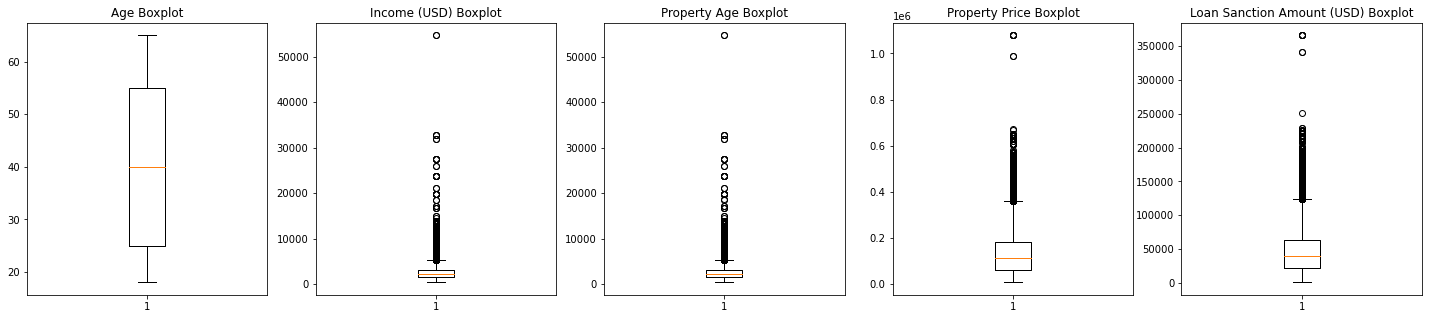

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,5, figsize = (25, 5))

ax[0].boxplot(data['Age'])
ax[1].boxplot(data['Income (USD)'])
ax[2].boxplot(data['Property Age'])
ax[3].boxplot(data['Property Price'])
ax[4].boxplot(data['Loan Sanction Amount (USD)'])

ax[0].set_title('Age Boxplot')
ax[1].set_title('Income (USD) Boxplot')
ax[2].set_title('Property Age Boxplot')
ax[3].set_title('Property Price Boxplot')
ax[4].set_title('Loan Sanction Amount (USD) Boxplot')

plt.show()

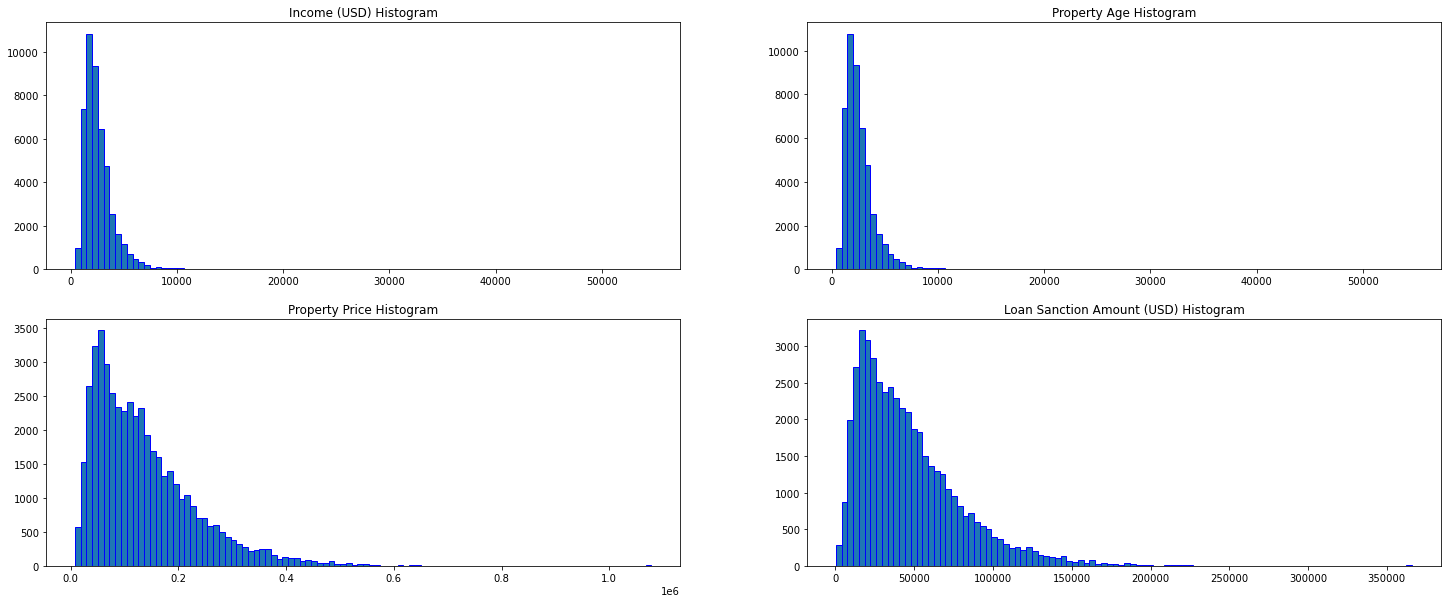

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,2, figsize = (25, 10))

ax[0,0].hist(data['Income (USD)'], bins = 100, edgecolor = 'b')
ax[0,1].hist(data['Property Age'], bins = 100, edgecolor = 'b')
ax[1,0].hist(data['Property Price'], bins = 100, edgecolor = 'b')
ax[1,1].hist(data['Loan Sanction Amount (USD)'], bins = 100, edgecolor = 'b')

ax[0,0].set_title('Income (USD) Histogram')
ax[0,1].set_title('Property Age Histogram')
ax[1,0].set_title('Property Price Histogram')
ax[1,1].set_title('Loan Sanction Amount (USD) Histogram')

plt.show()

It seems to be that there should be a significant number of outliers in the all data features except for 'Age' (although I cannot understand why the histogram of the Property Price Histogram's x-axis is scaled so small). Since the data is heavily skewed, we can try IQR to remove the outliers.

In [13]:
from distutils.command.clean import clean
from scipy.stats import iqr

clean_data = data[(data['Property Age'] <= data['Property Age'].quantile(0.75) + 1.5 *iqr(data['Property Age'], axis = 0)) & (data['Property Age'] >= data['Property Age'].quantile(0.25) - 1.5*iqr(data['Property Age'], axis = 0))]
clean_data = clean_data[(clean_data['Income (USD)'] <= clean_data['Income (USD)'].quantile(0.75) + 1.5*iqr(clean_data['Income (USD)'], axis = 0)) & (clean_data['Income (USD)'] >= clean_data['Income (USD)'].quantile(0.25) - 1.5*iqr(clean_data['Income (USD)'], axis = 0))]
clean_data = clean_data[(clean_data['Loan Sanction Amount (USD)'] <= clean_data['Loan Sanction Amount (USD)'].quantile(0.75) + 1.5*iqr(clean_data['Loan Sanction Amount (USD)'], axis = 0)) & (clean_data['Loan Sanction Amount (USD)'] >= clean_data['Loan Sanction Amount (USD)'].quantile(0.25) - 1.5*iqr(clean_data['Loan Sanction Amount (USD)'], axis = 0))]
clean_data = clean_data[(clean_data['Property Price'] <= clean_data['Property Price'].quantile(0.75) + 1.5*iqr(clean_data['Property Price'], axis = 0)) & (clean_data['Property Price'] >= clean_data['Property Price'].quantile(0.25) - 1.5*iqr(clean_data['Property Price'], axis = 0))]

clean_data

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336
5,F,28,1912.18,Low,1919.18,Urban,28692.18,10055.743846
...,...,...,...,...,...,...,...,...
47246,F,62,2121.48,Low,2135.48,Rural,240291.63,78800.491330
47247,M,38,1506.72,Low,1505.72,Rural,218431.37,72483.293359
47248,F,20,1595.10,Low,1582.10,Semi-Urban,154458.88,52462.861498
47249,F,50,2002.27,Low,2007.27,Semi-Urban,72277.78,22909.596763


This approach, I beleieve, is inappropriate, since it removes over 10% of the data samples and is completely arbitrary (the order of outlier removal in each data feature has a effeft on the final dataset). Another process we can use is Isolation Forest.

In [14]:
from sklearn.ensemble import IsolationForest
#create the method instance
isf = IsolationForest(random_state = 35)
#use fit_predict on the data as we are using all the data
preds = isf.fit_predict(data[["Income (USD)", "Property Age", "Property Price", 'Loan Sanction Amount (USD)']])
#extract outliers from the data
iso_forest_outliers = preds
iso_forest_outliers = iso_forest_outliers.astype(str)
#extract the scores from the data in terms of strength of outlier
iso_forest_score = isf.decision_function(data[["Income (USD)", "Property Age", "Property Price", 'Loan Sanction Amount (USD)']])
#print how many outliers the data suggests
print(pd.Series(iso_forest_outliers).value_counts())

1     38574
-1     8677
dtype: int64


The IsolationForest algorithm suggests that there are about 9000 outliers in the dataset, a number which I think is unreasonably large.

In [15]:
data['Income (USD)'].nlargest(10).index.tolist()

[40017, 24241, 43439, 28174, 15469, 23066, 44154, 39952, 39775, 35821]

In [16]:
data['Property Age'].nlargest(10).index.tolist()

[24241, 40017, 43439, 15469, 28174, 44154, 23066, 7965, 39775, 28078]

In [17]:
data['Property Price'].nlargest(10).index.tolist()

[9163, 10585, 25123, 30866, 32425, 33706, 46154, 19474, 5959, 5291]

In [18]:
data['Loan Sanction Amount (USD)'].nlargest(10).index.tolist()

[9163, 32425, 10585, 30866, 25123, 33706, 46154, 17766, 38944, 35320]

Further inspection of the highest values suggest explicable correlation between the these features (samples with the highest 'Income (USD)' have old houses, houses with high price receive high loan). This suggests the outliers are not caused by data collection and thus must be dealt with.

#### Data Transformation

We need to transform three columns: 'Gender', 'Income Stability', 'Property Location'

In [19]:
data['Gender'].value_counts()

F    23646
M    23605
Name: Gender, dtype: int64

In [20]:
print(data['Income Stability'].value_counts())

Low     43045
High     4206
Name: Income Stability, dtype: int64


Since the two data features only have two values each, I transform them using ordinal encoding.

In [21]:
# Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder
oenc1 = OrdinalEncoder()            #initializing an instance of OrdinalEncoder function
oenc2 = OrdinalEncoder()            #initializing an instance of OrdinalEncoder function
enc_gender = pd.DataFrame(oenc1.fit_transform(data[['Gender']]), columns = ['Gender'])          #fitting and transform the 'Gender" columns to an array, which is then wrapped in a pandas DataFrame to join with the original dataset
enc_insta = pd.DataFrame(oenc1.fit_transform(data[['Income Stability']]), columns = ['Income Stability'])          #fitting and transform the 'Gender" columns to an array, which is then wrapped in a pandas DataFrame to join with the original dataset
data.drop(['Gender', 'Income Stability'], axis = 1, inplace = True)
data = data.join((enc_gender, enc_insta))

In [22]:
data

,Age,Income (USD),Property Age,Property Location,Property Price,Loan Sanction Amount (USD),Gender,Income Stability
0,19,1641.25,1651.25,Rural,59641.82,21026.420753,0.0,1.0
1,29,1989.71,1990.71,Urban,179858.51,60595.183366,1.0,1.0
2,37,1849.91,1856.91,Rural,117297.62,39181.648002,0.0,1.0
3,65,2735.18,2747.18,Rural,354417.72,128497.710865,1.0,0.0
4,62,4741.78,4740.78,Urban,82049.80,39386.919336,0.0,0.0
...,...,...,...,...,...,...,...,...
47246,62,2121.48,2135.48,Rural,240291.63,78800.491330,0.0,1.0
47247,38,1506.72,1505.72,Rural,218431.37,72483.293359,1.0,1.0
47248,20,1595.10,1582.10,Semi-Urban,154458.88,52462.861498,0.0,1.0
47249,50,2002.27,2007.27,Semi-Urban,72277.78,22909.596763,0.0,1.0


In [23]:
data['Property Location'].value_counts()

Semi-Urban    16361
Rural         15941
Urban         14949
Name: Property Location, dtype: int64

In [24]:
data

,Age,Income (USD),Property Age,Property Location,Property Price,Loan Sanction Amount (USD),Gender,Income Stability
0,19,1641.25,1651.25,Rural,59641.82,21026.420753,0.0,1.0
1,29,1989.71,1990.71,Urban,179858.51,60595.183366,1.0,1.0
2,37,1849.91,1856.91,Rural,117297.62,39181.648002,0.0,1.0
3,65,2735.18,2747.18,Rural,354417.72,128497.710865,1.0,0.0
4,62,4741.78,4740.78,Urban,82049.80,39386.919336,0.0,0.0
...,...,...,...,...,...,...,...,...
47246,62,2121.48,2135.48,Rural,240291.63,78800.491330,0.0,1.0
47247,38,1506.72,1505.72,Rural,218431.37,72483.293359,1.0,1.0
47248,20,1595.10,1582.10,Semi-Urban,154458.88,52462.861498,0.0,1.0
47249,50,2002.27,2007.27,Semi-Urban,72277.78,22909.596763,0.0,1.0


For 'Property Location', there exist three roughly equal ordinal categories. I will test both one-hot encoding and label encoding for this feature

In [25]:
#One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()           #initializing an instance of OneHotEncoder
encoder.fit(data[['Property Location']])            #fitting the encoder to the data feature
encoded_column = pd.DataFrame(encoder.transform(data[['Property Location']]).toarray(), columns = encoder.categories_)          #transforming the data feature
data1 = data.join(encoded_column)           #joining the encoded data feature with the dataset  
data1.drop(columns = 'Property Location', inplace = True)   

In [26]:
#Label Encoding
data2 = data.replace({'Rural' : 0 , 'Semi-Urban' : 1, 'Urban' : 2})
data2

,Age,Income (USD),Property Age,Property Location,Property Price,Loan Sanction Amount (USD),Gender,Income Stability
0,19,1641.25,1651.25,0,59641.82,21026.420753,0.0,1.0
1,29,1989.71,1990.71,2,179858.51,60595.183366,1.0,1.0
2,37,1849.91,1856.91,0,117297.62,39181.648002,0.0,1.0
3,65,2735.18,2747.18,0,354417.72,128497.710865,1.0,0.0
4,62,4741.78,4740.78,2,82049.80,39386.919336,0.0,0.0
...,...,...,...,...,...,...,...,...
47246,62,2121.48,2135.48,0,240291.63,78800.491330,0.0,1.0
47247,38,1506.72,1505.72,0,218431.37,72483.293359,1.0,1.0
47248,20,1595.10,1582.10,1,154458.88,52462.861498,0.0,1.0
47249,50,2002.27,2007.27,1,72277.78,22909.596763,0.0,1.0


### Splitting Data

In [35]:
# specifying data features and data label
feature = data1.columns.tolist()
feature.remove('Loan Sanction Amount (USD)')        # Get feature names.
feature_data = data1[feature]        # creating a dataframe with only the feature data
label_data = data1['Loan Sanction Amount (USD)']        #Splitting label data

c:\Users\PV\anaconda3\lib\site-packages\pandas\core\common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


In [59]:
#splitting the data into training and testing
from sklearn.model_selection import train_test_split
trainX,testX, trainY, testY = train_test_split(feature_data, label_data, train_size=0.70, random_state=35)

### Data Scaling

In this assignment, I scale the data using standardization.

In [60]:
from sklearn.preprocessing import StandardScaler     # Import function to perform Standardization
scaler = StandardScaler()                            # Initialize the StandardScaler
scaler.fit(trainX)       # Fit the scaler to the training data
scaled_trainX = scaler.transform(trainX)            #transforming the training data using the statistics from training data           
scaled_testX = scaler.transform(testX)              #transforming the testing data using the statistics from training data 

c:\Users\PV\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\PV\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\PV\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


## Constructing Linear Model

### First Model

In [64]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(scaled_trainX, trainY)
predY = regressor.predict(scaled_testX)

In [65]:
coefficients = pd.concat([pd.DataFrame(trainX.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
coefficients

,0,0
0,Age,-1271.725913
1,Income (USD),755.610212
2,Property Age,860.798672
3,Property Price,31920.008913
4,Gender,-117.612971
5,Income Stability,-3169.686257
6,"(Rural,)",62.722632
7,"(Semi-Urban,)",-64.253901
8,"(Urban,)",2.055914


In [66]:
#evaluating the model
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred = predY, y_true = testY) 

112.71319539034972

In [102]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor, feature_data, label_data, cv=5)
pd.DataFrame(scores).describe()

c:\Users\PV\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\PV\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\PV\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\PV\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\PV\anaconda3\lib\site-p

,0
count,5.000000
mean,0.997990
std,0.001007
min,0.996291
25%,0.997967
50%,0.998355
75%,0.998424
max,0.998912


This model predict with less than 0.3% error with a 0.1% standard deviation.

### Second Model
With normalized 'Property Location' using Ordinal Encoder

In [71]:
# specifying data features and data label
feature2 = data2.columns.tolist()
feature2.remove('Loan Sanction Amount (USD)')        # Get feature names.
feature_data2 = data2[feature2]        # creating a dataframe with only the feature data
label_data2 = data2['Loan Sanction Amount (USD)']        #Splitting label data
#splitting the data into training and testing
from sklearn.model_selection import train_test_split
trainX2,testX2, trainY2, testY2 = train_test_split(feature_data2, label_data2, train_size=0.70, random_state=35)

In [76]:
#normalize the data
from sklearn.preprocessing import Normalizer
norm = Normalizer()
norm.fit(trainX2)
norm_trainX = norm.transform(trainX2)
norm_testX = norm.transform(testX2)

In [104]:
model2 = LinearRegression()
model2.fit(norm_trainX, trainY2)
predy2 = model2.predict(norm_testX)
mean_absolute_error(y_pred= predy2, y_true = testY2)
# there must be a mistake somewhere...

16960.4696670551

In [79]:
coefficients2 = pd.concat([pd.DataFrame(trainX2.columns),pd.DataFrame(np.transpose(model2.coef_))], axis = 1)
coefficients2

,0,0
0,Age,-1.464045e+07
1,Income (USD),-2.518615e+06
2,Property Age,2.121226e+06
3,Property Location,-4.973194e+07
4,Property Price,-1.629084e+06
5,Gender,2.841687e+05
6,Income Stability,-1.021305e+09


In [103]:
scores2 = cross_val_score(model2, feature_data2, label_data2, cv=5)
pd.DataFrame(scores2).describe()

,0
count,5.000000
mean,0.997980
std,0.001005
min,0.996286
25%,0.997957
50%,0.998344
75%,0.998410
max,0.998905


### Third Model
Second-degree Polymonial Regression

In [89]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly_train = poly_reg.fit_transform(scaled_trainX)
X_poly_test = poly_reg.transform(scaled_testX)

model3 = LinearRegression()
model3.fit(X_poly_train, trainY)
y_pred_poly = model3.predict(X_poly_test)

In [90]:
mean_absolute_error(y_pred= y_pred_poly , y_true = testY)

135.87342746997123

In [101]:
scores3 = cross_val_score(model3, feature_data, label_data, cv=5)
pd.DataFrame(scores3).describe()

c:\Users\PV\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\PV\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\PV\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\PV\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\PV\anaconda3\lib\site-p

,0
count,5.000000
mean,0.997990
std,0.001007
min,0.996291
25%,0.997967
50%,0.998355
75%,0.998424
max,0.998912


The three model perform roughly the same.

## Failure

{'whiskers': [<matplotlib.lines.Line2D at 0x261d1100f40>,
 'caps': [<matplotlib.lines.Line2D at 0x261d110c520>,
 'boxes': [<matplotlib.lines.Line2D at 0x261d1100c70>],
 'medians': [<matplotlib.lines.Line2D at 0x261d110cac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x261d110cd90>],
 'means': []}

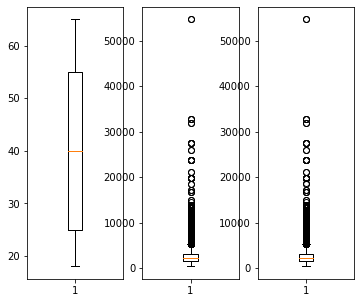

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))

plot1 = plt.subplot2grid((1, 5), (0, 0))
plot2 = plt.subplot2grid((1, 5), (0, 1))
plot3 = plt.subplot2grid((1, 5), (0, 2))


plot1.boxplot(data['Age'])
plot2.boxplot(data['Income (USD)'])
plot3.boxplot(data['Property Age'])

#take too long to run
#import matplotlib.pyplot as plt
#fig, ax = plt.subplots(2, 3, figsize = (14,8), dpi = 400)

#ax[0,0].hist(data['Loan Sanction Amount (USD)'], bins = np.arange(min(data['Loan Sanction Amount (USD)']), max(data['Loan Sanction Amount (USD)']), 1000))
#ax[0,1].hist(data['Age'], bins = np.arange(min(data['Age']), max(data['Age']), 1000))
#ax[0,2].hist(data['Income (USD)'], bins = np.arange(min(data['Loan Sanction Amount (USD)']), max(data['Loan Sanction Amount (USD)']), 5))
#ax[1,0].hist(data['Property Age'], bins = np.arange(min(data['Loan Sanction Amount (USD)']), max(data['Loan Sanction Amount (USD)']), 10))
#ax[1,1].hist(data['Propoerty Size'], bins = np.arange(min(data['Loan Sanction Amount (USD)']), max(data['Loan Sanction Amount (USD)']), 50))
#ax[1,2].hist(data['Property Price)'], bins = np.arange(min(data['Property Price']), max(data['Property Price']), 1000))

#plt.show()